# SVM Classifier for Fashion-MNIST

In this notebook, I will implement a Support Vector Machine (SVM) classifier to classify the Fashion-MNIST dataset.

In [9]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn 
import torch.nn.functional as F 

from tensorflow.keras.datasets import fashion_mnist

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

import utils

from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

In [10]:
# Load data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [13]:
X_train[0].shape

(28, 28)

In [14]:
# Flatten the images
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [20]:
def train_and_test_svm(kernel='rbf', C=1.0, degree=3, gamma='scale'):
    # Initialize the SVM model
    svm_model = SVC(kernel=kernel, C=C, degree=degree, gamma=gamma)

    # Train the model
    svm_model.fit(X_train, y_train)

    # Make predictions
    y_pred = svm_model.predict(X_test)

    # Evaluate the model
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    # Plot some predictions
    for i in range(5):
        plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
        plt.title(f"True: {y_test[i]}, Pred: {y_pred[i]}")
        plt.show()

[[856   0   9  29   3   1  90   0  12   0]
 [  4 961   3  25   3   0   4   0   0   0]
 [ 13   1 815  12  92   0  64   0   3   0]
 [ 28   3  12 893  31   0  29   0   4   0]
 [  0   0  84  30 821   0  61   0   4   0]
 [  0   0   0   1   0 958   0  26   2  13]
 [142   1  92  31  67   0 647   0  20   0]
 [  0   0   0   0   0  20   0 959   0  21]
 [  3   0   2   5   4   4   3   4 974   1]
 [  0   0   0   0   0   8   0  37   3 952]]
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1000
           1       0.99      0.96      0.98      1000
           2       0.80      0.81      0.81      1000
           3       0.87      0.89      0.88      1000
           4       0.80      0.82      0.81      1000
           5       0.97      0.96      0.96      1000
           6       0.72      0.65      0.68      1000
           7       0.93      0.96      0.95      1000
           8       0.95      0.97      0.96      1000
           9       0.96     

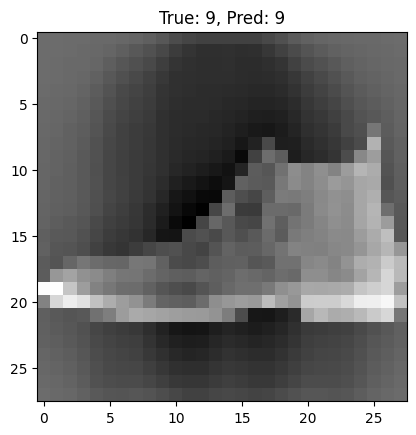

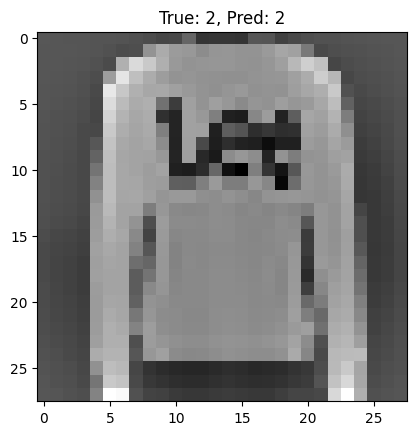

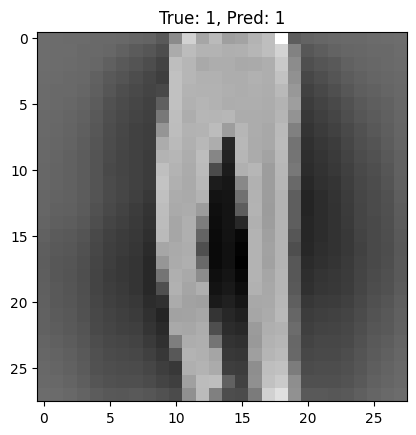

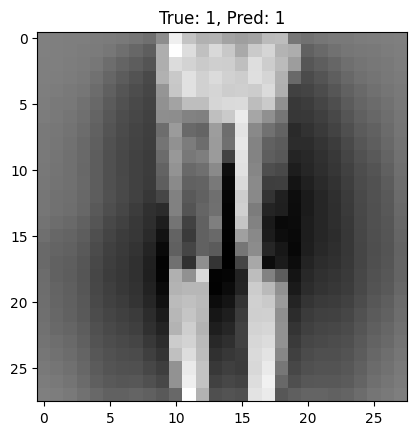

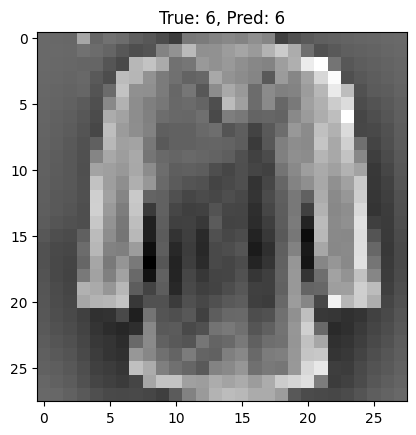

In [21]:
train_and_test_svm(kernel='rbf', C=1.0, degree=3, gamma='scale')

[[856   0   9  29   3   1  90   0  12   0]
 [  4 961   3  25   3   0   4   0   0   0]
 [ 13   1 815  12  92   0  64   0   3   0]
 [ 28   3  12 893  31   0  29   0   4   0]
 [  0   0  84  30 821   0  61   0   4   0]
 [  0   0   0   1   0 958   0  26   2  13]
 [142   1  92  31  67   0 647   0  20   0]
 [  0   0   0   0   0  20   0 959   0  21]
 [  3   0   2   5   4   4   3   4 974   1]
 [  0   0   0   0   0   8   0  37   3 952]]
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1000
           1       0.99      0.96      0.98      1000
           2       0.80      0.81      0.81      1000
           3       0.87      0.89      0.88      1000
           4       0.80      0.82      0.81      1000
           5       0.97      0.96      0.96      1000
           6       0.72      0.65      0.68      1000
           7       0.93      0.96      0.95      1000
           8       0.95      0.97      0.96      1000
           9       0.96     

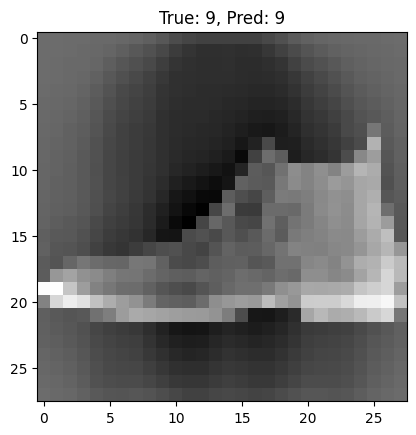

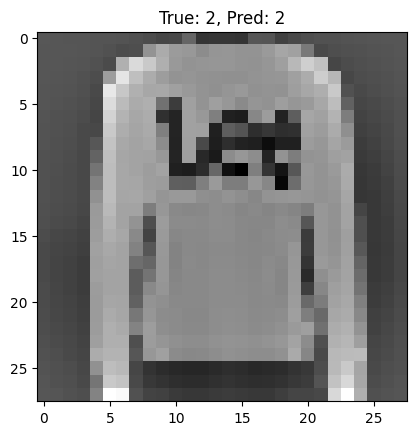

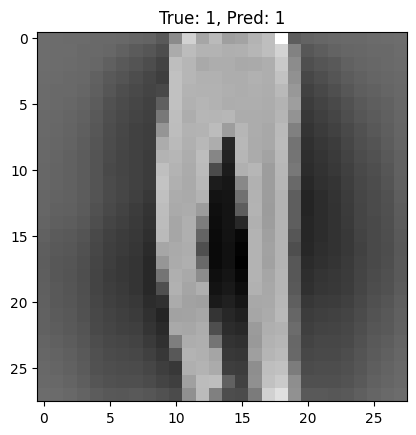

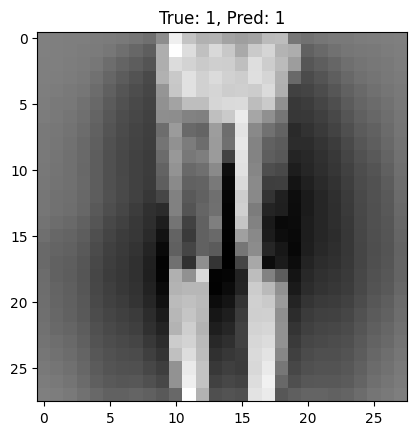

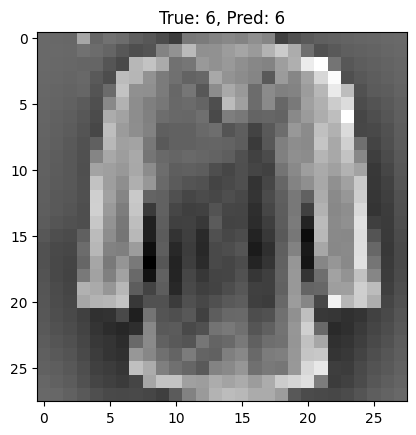

In [22]:
train_and_test_svm(kernel='rbf', C=1.0, degree=10, gamma='scale')

[[810   5  11  51   5   1 111   0   6   0]
 [  8 961   4  21   2   0   2   0   2   0]
 [ 32   7 752   8 108   0  87   0   6   0]
 [ 47  22  25 834  27   0  41   0   3   1]
 [  1   3 115  40 767   0  70   0   4   0]
 [  0   0   0   0   0 924   0  39   3  34]
 [165   2 120  36 105   0 559   0  13   0]
 [  0   0   0   0   0  43   0 929   1  27]
 [ 18   1  14  12   8  17  28   4 898   0]
 [  0   0   0   0   0  27   1  36   0 936]]
              precision    recall  f1-score   support

           0       0.75      0.81      0.78      1000
           1       0.96      0.96      0.96      1000
           2       0.72      0.75      0.74      1000
           3       0.83      0.83      0.83      1000
           4       0.75      0.77      0.76      1000
           5       0.91      0.92      0.92      1000
           6       0.62      0.56      0.59      1000
           7       0.92      0.93      0.93      1000
           8       0.96      0.90      0.93      1000
           9       0.94     

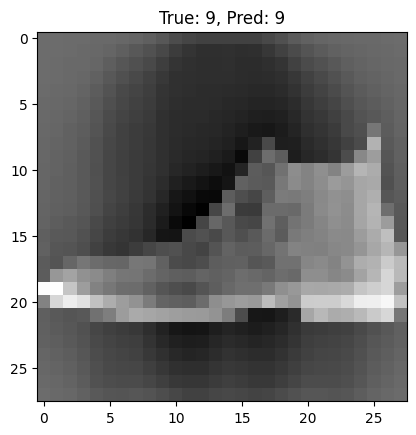

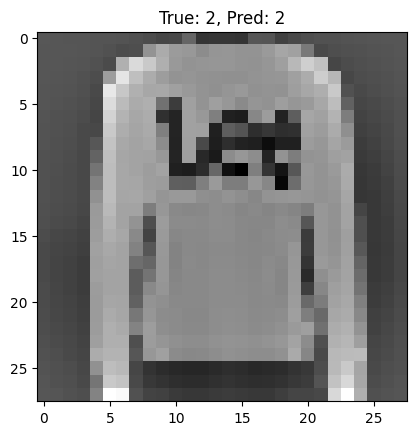

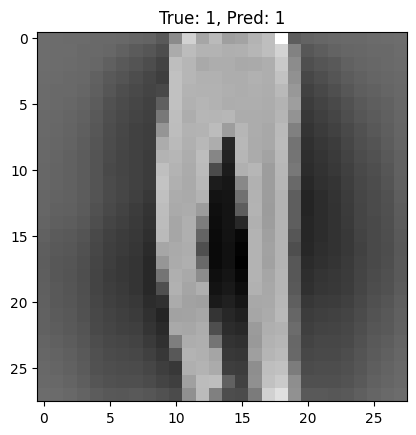

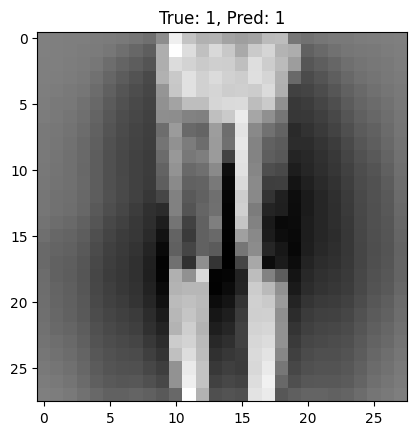

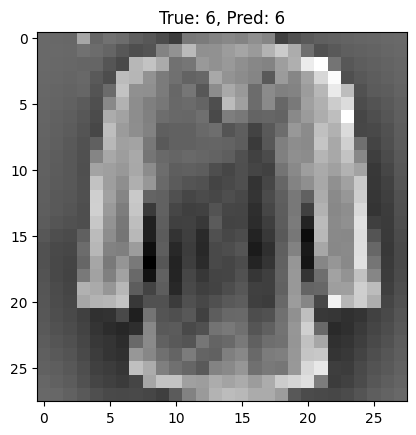

In [23]:
train_and_test_svm(kernel='linear', C=1.0, degree=10, gamma='scale')

[[345   2   4  26   1   2 614   1   4   1]
 [  0 651   0  87   2   0 260   0   0   0]
 [  7   0 298   5  44   4 632   5   5   0]
 [  4   0   0 671   6   1 317   0   1   0]
 [  0   1  25  42 381   1 548   0   2   0]
 [  0   0   0   0   0 698 253  29   1  19]
 [ 37   4  35  16  24   3 858   9  14   0]
 [  0   0   0   0   0  10 140 836   0  14]
 [  0   5   1  13   1   5 355   6 613   1]
 [  0   1   0   0   0   1 165  28   0 805]]
              precision    recall  f1-score   support

           0       0.88      0.34      0.50      1000
           1       0.98      0.65      0.78      1000
           2       0.82      0.30      0.44      1000
           3       0.78      0.67      0.72      1000
           4       0.83      0.38      0.52      1000
           5       0.96      0.70      0.81      1000
           6       0.21      0.86      0.33      1000
           7       0.91      0.84      0.87      1000
           8       0.96      0.61      0.75      1000
           9       0.96     

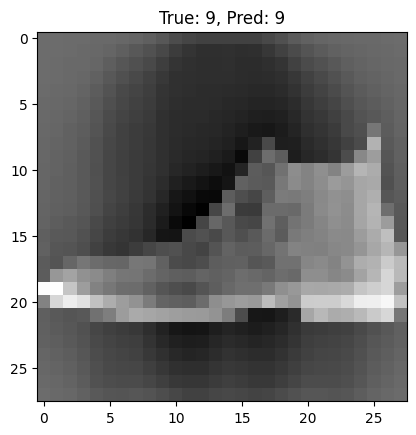

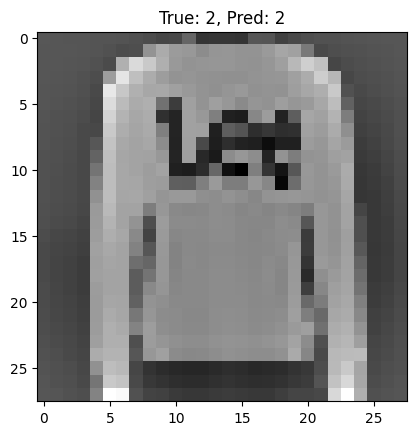

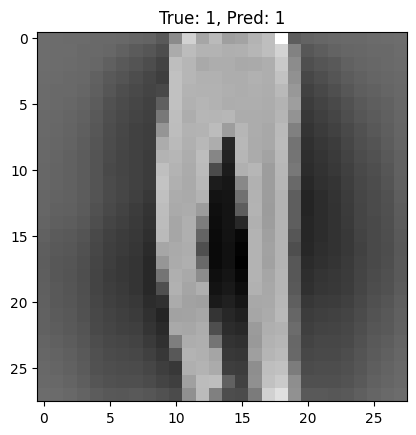

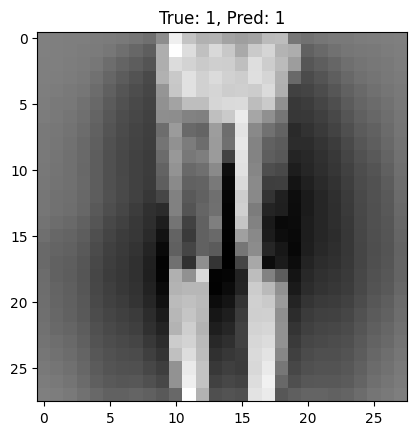

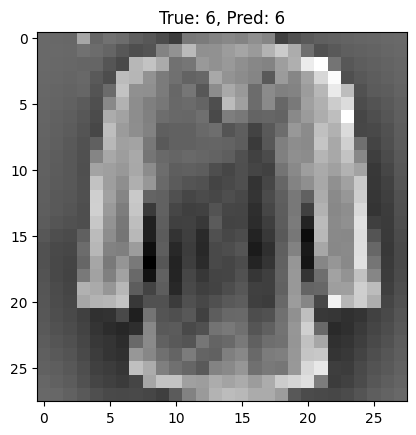

In [24]:
train_and_test_svm(kernel='poly', C=1.0, degree=10, gamma='scale')

[[737  12  42  49   6   2 111   0  40   1]
 [ 31 915  10  35   2   0   5   0   2   0]
 [ 46   5 622  20  92   0 200   0  15   0]
 [112  28  27 751  30   2  45   0   5   0]
 [ 14   7 347  47 419   0 159   0   7   0]
 [  0   0   0   1   0 799   0 118  10  72]
 [210   8 295  36  91   1 309   0  50   0]
 [  0   0   0   0   0  99   0 833   2  66]
 [ 44   1  46  10   8  18  27   3 837   6]
 [  0   0   0   0   0  63   1  80   4 852]]
              precision    recall  f1-score   support

           0       0.62      0.74      0.67      1000
           1       0.94      0.92      0.93      1000
           2       0.45      0.62      0.52      1000
           3       0.79      0.75      0.77      1000
           4       0.65      0.42      0.51      1000
           5       0.81      0.80      0.81      1000
           6       0.36      0.31      0.33      1000
           7       0.81      0.83      0.82      1000
           8       0.86      0.84      0.85      1000
           9       0.85     

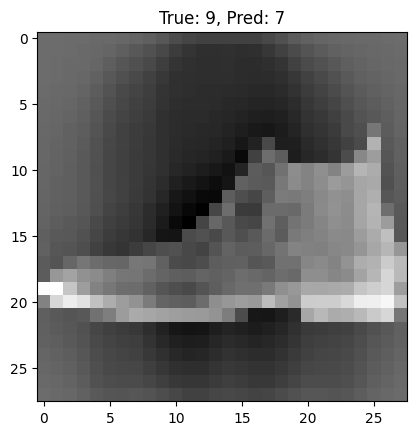

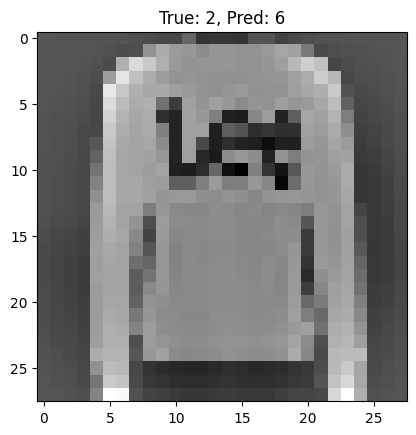

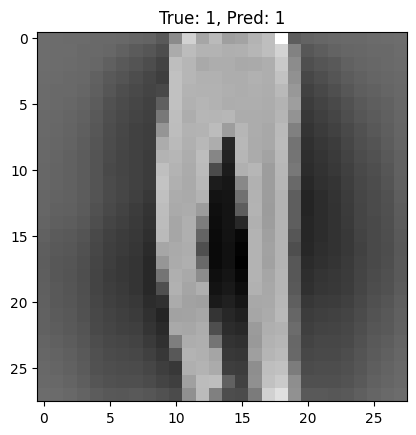

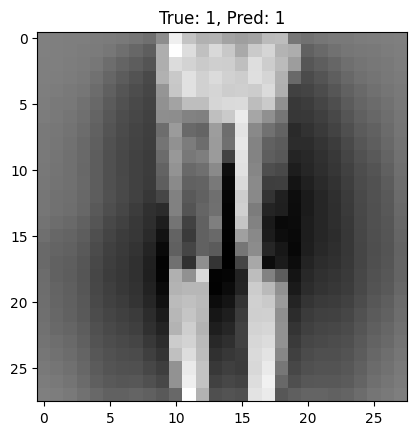

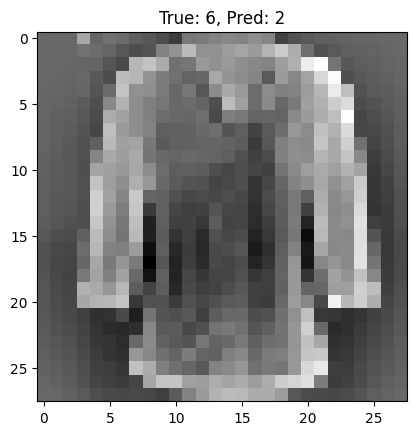

In [25]:
train_and_test_svm(kernel='sigmoid', C=1.0, degree=10, gamma='scale')

[[848   0   5  37   5   1  89   0  15   0]
 [  2 957   4  29   3   0   5   0   0   0]
 [ 14   0 799  14 105   0  62   0   6   0]
 [ 30   3  10 889  30   0  34   0   4   0]
 [  0   0  85  31 813   0  67   0   4   0]
 [  0   0   0   1   0 950   0  31   2  16]
 [141   1 103  35  67   0 628   0  25   0]
 [  0   0   0   0   0  21   0 952   0  27]
 [  2   0   3   6   3   4   5   4 972   1]
 [  0   0   0   0   0  12   0  40   4 944]]
              precision    recall  f1-score   support

           0       0.82      0.85      0.83      1000
           1       1.00      0.96      0.98      1000
           2       0.79      0.80      0.80      1000
           3       0.85      0.89      0.87      1000
           4       0.79      0.81      0.80      1000
           5       0.96      0.95      0.96      1000
           6       0.71      0.63      0.66      1000
           7       0.93      0.95      0.94      1000
           8       0.94      0.97      0.96      1000
           9       0.96     

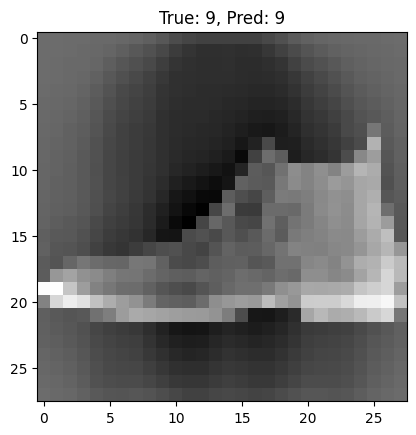

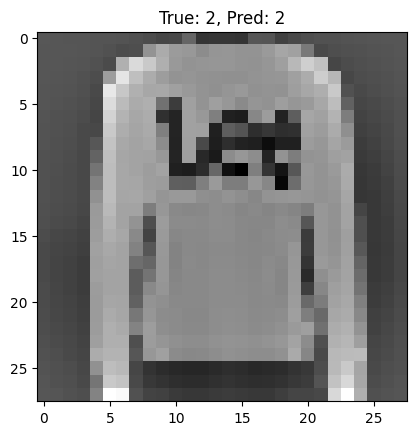

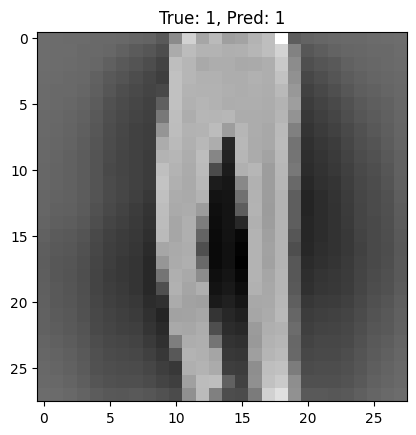

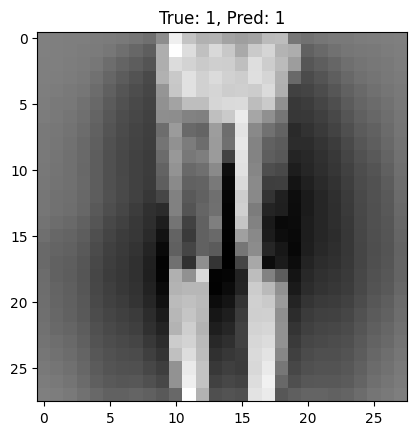

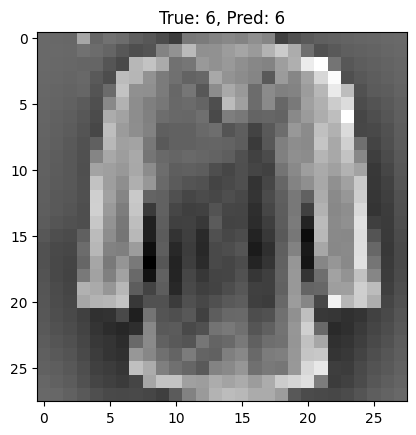

In [26]:
train_and_test_svm(kernel='rbf', C=0.5, degree=1, gamma='scale')

[[823   0   4  66   3   1  80   0  23   0]
 [  2 947   7  33   4   0   5   0   2   0]
 [  8   0 753  13 137   0  77   0  12   0]
 [ 31   4   7 885  24   1  44   0   4   0]
 [  0   0  80  35 785   0  88   0  12   0]
 [  0   0   0   2   0 921   0  45   6  26]
 [176   0 110  41  89   0 545   0  39   0]
 [  0   0   0   0   0  27   0 927   0  46]
 [  2   0   5   6   3   5  11   4 963   1]
 [  0   0   0   0   0  18   0  45  11 926]]
              precision    recall  f1-score   support

           0       0.79      0.82      0.81      1000
           1       1.00      0.95      0.97      1000
           2       0.78      0.75      0.77      1000
           3       0.82      0.89      0.85      1000
           4       0.75      0.79      0.77      1000
           5       0.95      0.92      0.93      1000
           6       0.64      0.55      0.59      1000
           7       0.91      0.93      0.92      1000
           8       0.90      0.96      0.93      1000
           9       0.93     

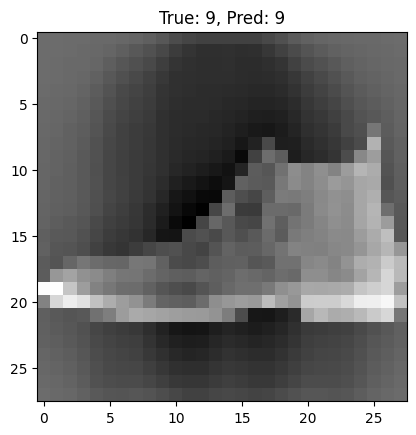

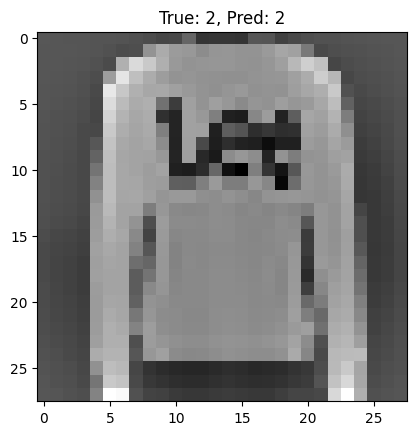

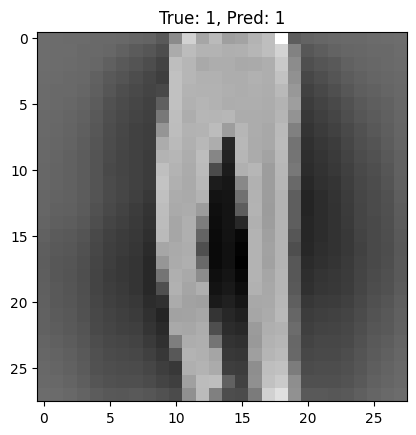

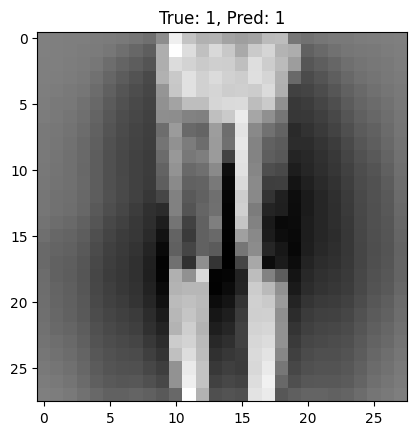

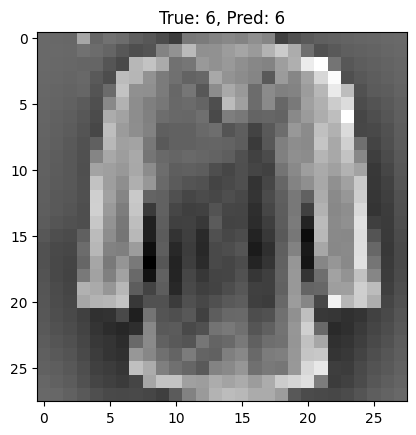

In [27]:
train_and_test_svm(kernel='rbf', C=0.1, degree=1, gamma='scale')

[[823   0   4  66   3   1  80   0  23   0]
 [  2 947   7  33   4   0   5   0   2   0]
 [  8   0 753  13 137   0  77   0  12   0]
 [ 31   4   7 885  24   1  44   0   4   0]
 [  0   0  80  35 785   0  88   0  12   0]
 [  0   0   0   2   0 921   0  45   6  26]
 [176   0 110  41  89   0 545   0  39   0]
 [  0   0   0   0   0  27   0 927   0  46]
 [  2   0   5   6   3   5  11   4 963   1]
 [  0   0   0   0   0  18   0  45  11 926]]
              precision    recall  f1-score   support

           0       0.79      0.82      0.81      1000
           1       1.00      0.95      0.97      1000
           2       0.78      0.75      0.77      1000
           3       0.82      0.89      0.85      1000
           4       0.75      0.79      0.77      1000
           5       0.95      0.92      0.93      1000
           6       0.64      0.55      0.59      1000
           7       0.91      0.93      0.92      1000
           8       0.90      0.96      0.93      1000
           9       0.93     

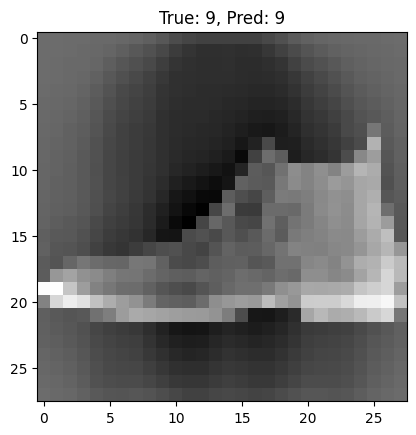

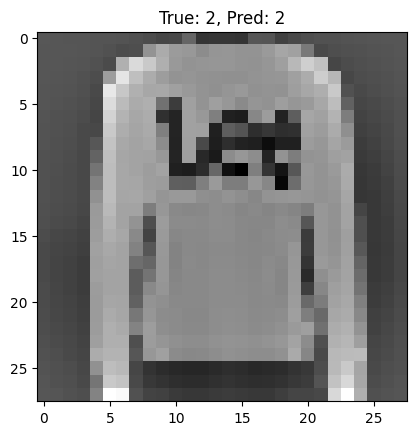

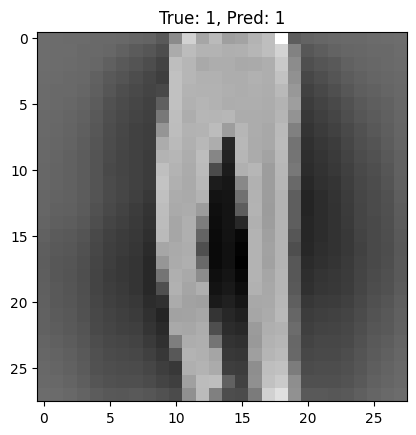

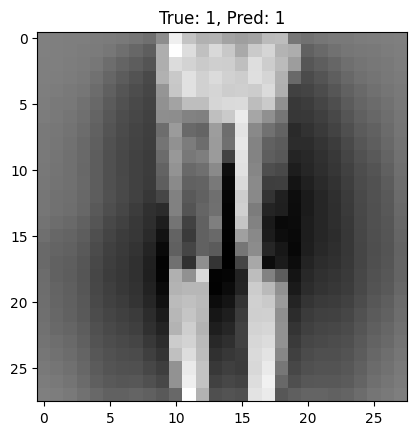

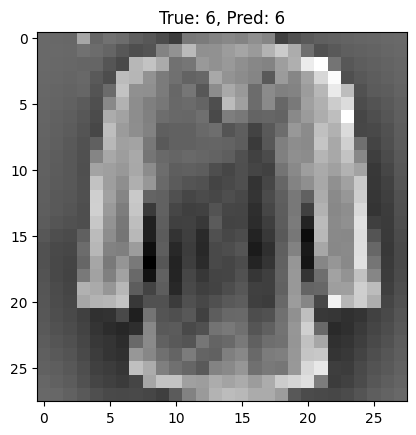

In [28]:
train_and_test_svm(kernel='rbf', C=0.1, degree=10, gamma='scale')

[[819   3   7  54   4   1 104   0   8   0]
 [  5 960   2  26   3   0   3   0   1   0]
 [ 23   7 767  10 102   0  85   0   6   0]
 [ 53  21  22 840  25   0  36   0   3   0]
 [  1   2 113  35 773   0  72   0   4   0]
 [  0   0   0   1   0 941   0  35   3  20]
 [165   3 126  38  94   0 555   0  19   0]
 [  0   0   0   0   0  39   0 936   1  24]
 [ 11   1  12  12   4  16  20   2 922   0]
 [  0   0   1   0   0  21   0  35   0 943]]
              precision    recall  f1-score   support

           0       0.76      0.82      0.79      1000
           1       0.96      0.96      0.96      1000
           2       0.73      0.77      0.75      1000
           3       0.83      0.84      0.83      1000
           4       0.77      0.77      0.77      1000
           5       0.92      0.94      0.93      1000
           6       0.63      0.56      0.59      1000
           7       0.93      0.94      0.93      1000
           8       0.95      0.92      0.94      1000
           9       0.96     

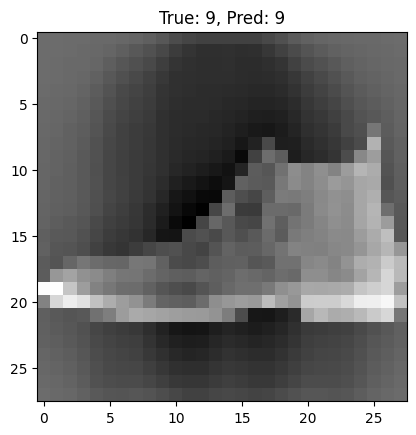

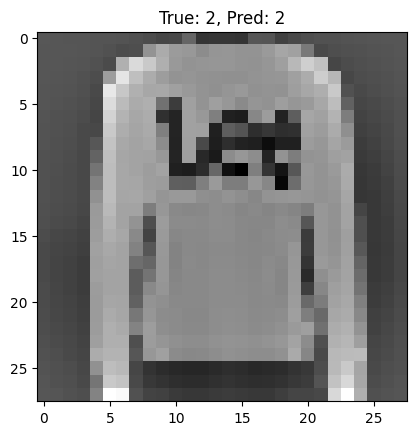

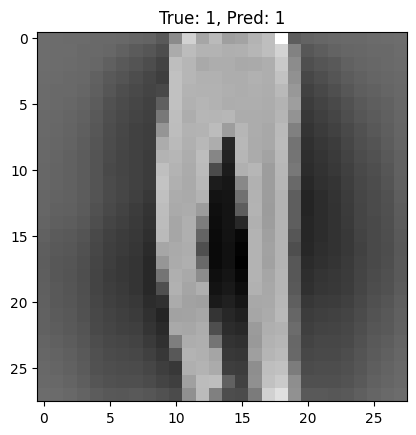

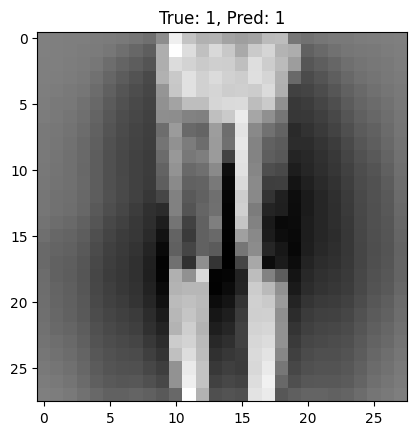

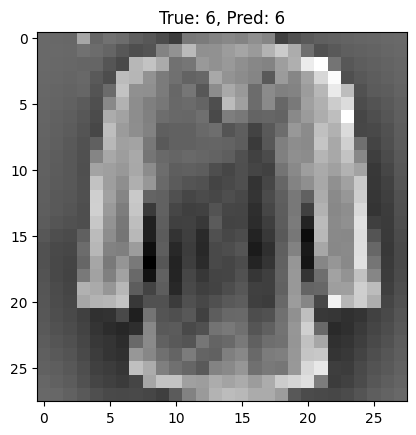

In [29]:
train_and_test_svm(kernel='linear', C=0.1, degree=1, gamma='scale')

[[271   1   1 691   2   2  25   0   6   1]
 [  0 409   0 589   2   0   0   0   0   0]
 [  6   0 251 671  42   1  25   0   4   0]
 [  2   0   0 994   1   0   3   0   0   0]
 [  0   0  19 664 289   0  25   0   3   0]
 [  0   0   0 471   0 494   0  26   0   9]
 [ 32   2  23 769  19   1 139   0  15   0]
 [  0   0   0 383   0  14   0 591   0  12]
 [  1   0   0 503   0   3   3   1 489   0]
 [  0   0   0 317   0   0   1  19   0 663]]
              precision    recall  f1-score   support

           0       0.87      0.27      0.41      1000
           1       0.99      0.41      0.58      1000
           2       0.85      0.25      0.39      1000
           3       0.16      0.99      0.28      1000
           4       0.81      0.29      0.43      1000
           5       0.96      0.49      0.65      1000
           6       0.63      0.14      0.23      1000
           7       0.93      0.59      0.72      1000
           8       0.95      0.49      0.64      1000
           9       0.97     

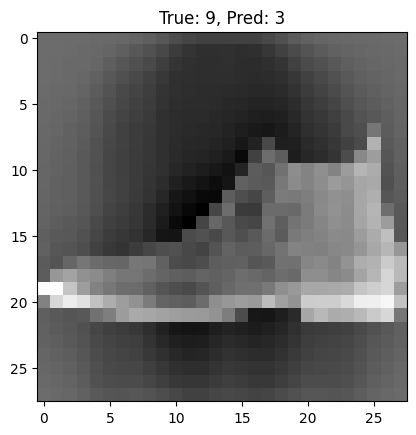

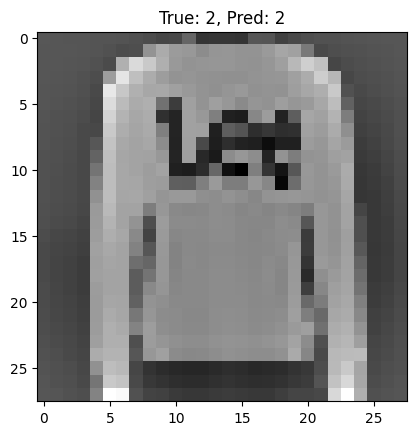

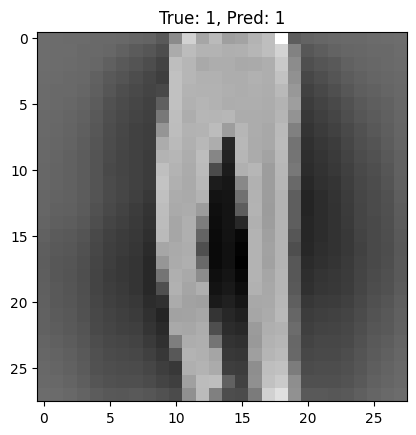

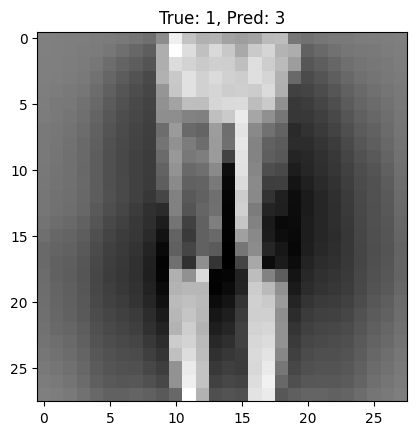

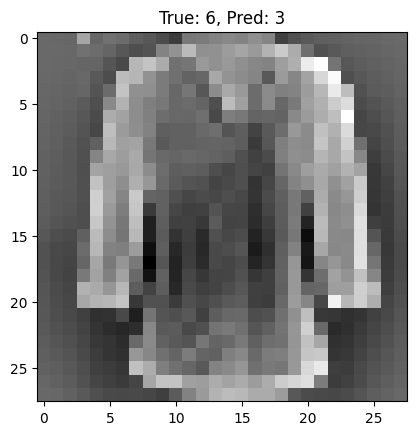

In [30]:
train_and_test_svm(kernel='poly', C=0.1, degree=10, gamma='scale')